In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [39]:
i=pd.read_csv('/content/drive/MyDrive/AMA/Life Expectancy Data.csv')
i.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [40]:
i.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


In [41]:
i.count()

,0
Country,2938
Year,2938
Status,2938
Life expectancy,2928
Adult Mortality,2928
infant deaths,2938
Alcohol,2744
percentage expenditure,2938
Hepatitis B,2385
Measles,2938


In [42]:
i.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [70]:
i.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2928.0,2.007500e+03,4.610560e+00,2000.000000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Life expectancy,2928.0,6.923320e+01,9.500077e+00,44.200000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.620874e+02,1.158667e+02,1.000000,74.000000,1.440000e+02,2.280000e+02,4.590000e+02
infant deaths,2928.0,1.368169e+01,1.912489e+01,0.000000,0.000000,3.000000e+00,2.200000e+01,5.500000e+01
Alcohol,2928.0,4.708090e+00,3.993939e+00,0.010000,1.100000,3.955000e+00,7.812500e+00,1.787000e+01
percentage expenditure,2928.0,2.848896e+02,3.903858e+02,0.000000,4.853964,6.561145e+01,4.426143e+02,1.099255e+03
Hepatitis B,2928.0,8.288042e+01,1.816146e+01,41.375000,74.150000,9.200000e+01,9.600000e+01,9.900000e+01
Measles,2928.0,2.354695e+02,3.556949e+02,0.000000,0.000000,1.700000e+01,3.622500e+02,9.056250e+02
BMI,2928.0,3.823633e+01,1.985019e+01,1.000000,19.400000,4.300000e+01,5.610000e+01,7.760000e+01
under-five deaths,2928.0,1.802732e+01,2.521558e+01,0.000000,0.000000,4.000000e+00,2.800000e+01,7.000000e+01


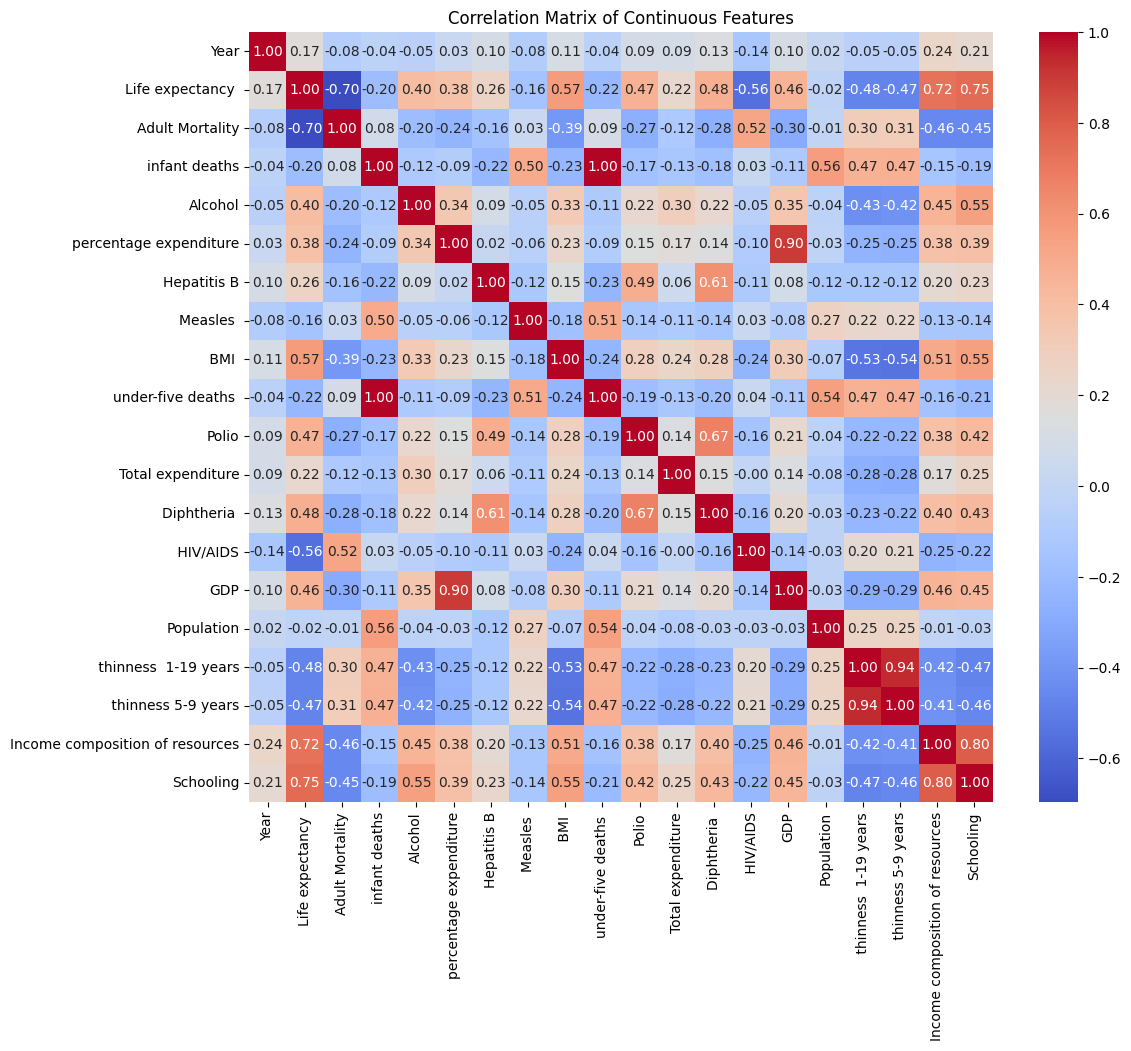

In [43]:
# prompt: correlation matrix for the contimuous data in the above table and visualize

# Create a correlation matrix for continuous features
continuous_features = i.select_dtypes(include=['number'])
correlation_matrix = continuous_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()

In [44]:
# prompt: use KNN for replacing null values in Income composition of resources,Schooling,Hepatitis B,GDP,Population

from sklearn.impute import KNNImputer

# Select columns with missing values to impute
cols_to_impute = ['Income composition of resources', 'Schooling', 'Hepatitis B', 'GDP', 'Population','Alcohol','Total expenditure']

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data for the selected columns
i[cols_to_impute] = imputer.fit_transform(i[cols_to_impute])

# Now 'i' DataFrame has imputed values for the specified columns
i

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [45]:
# prompt: replace null values with mean for thinness 1-19 years,thinness 5-9 years,BMI,Diphtheria,Polio,Adult Mortality

# Replace null values with the mean for specific columns
columns_to_fill = ['Diphtheria ', 'Polio', 'Adult Mortality'] # removed the extra brackets
for col in columns_to_fill:
    i[col].fillna(i[col].mean(), inplace=True)


In [46]:
# prompt: replace null with mean

# Replace null values with the mean for specific columns
columns_to_fill = [' thinness  1-19 years', ' thinness 5-9 years'," BMI "]
for col in columns_to_fill:
    i[col].fillna(i[col].mean(), inplace=True)

i.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [47]:
# prompt: remove null values

# Assuming 'i' is your DataFrame and you want to remove rows with any null values
i.dropna(inplace=True)

# Alternatively, if you want to remove columns with any null values:
# i.dropna(axis=1, inplace=True)

# Check for remaining null values
i.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [48]:
# prompt: identify outliers in continuous data

# Assuming 'i' is your DataFrame and contains the continuous data
# Identify outliers using the IQR method for each continuous column
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Example usage for the 'Life expectancy ' column
outliers_life_expectancy = identify_outliers_iqr(i, 'Life expectancy ')
print("Outliers in 'Life expectancy ':\n", outliers_life_expectancy)


# To identify outliers in all continuous columns
continuous_cols = i.select_dtypes(include=np.number).columns
for col in continuous_cols:
    outliers = identify_outliers_iqr(i, col)
    print(f"Outliers in '{col}':\n", outliers)
    # You can choose to remove these outliers or treat them as needed:
    # i = i[~i.index.isin(outliers.index)]  # Remove outliers


Outliers in 'Life expectancy ':
            Country  Year      Status  Life expectancy   Adult Mortality  \
1127         Haiti  2010  Developing              36.3            682.0   
1583        Malawi  2002  Developing              44.0             67.0   
1584        Malawi  2001  Developing              43.5            599.0   
1585        Malawi  2000  Developing              43.1            588.0   
2307  Sierra Leone  2005  Developing              43.3             48.0   
2308  Sierra Leone  2004  Developing              42.3            496.0   
2309  Sierra Leone  2003  Developing              41.5             57.0   
2311  Sierra Leone  2001  Developing              41.0            519.0   
2312  Sierra Leone  2000  Developing              39.0            533.0   
2921        Zambia  2000  Developing              43.8            614.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1127             23     5.76               36.292918         8

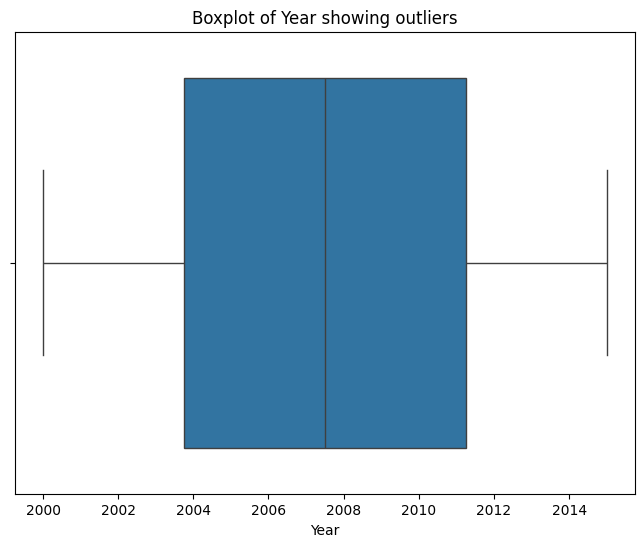

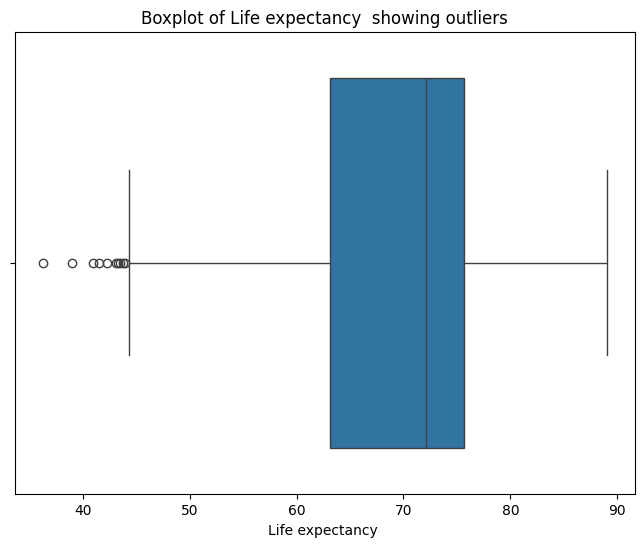

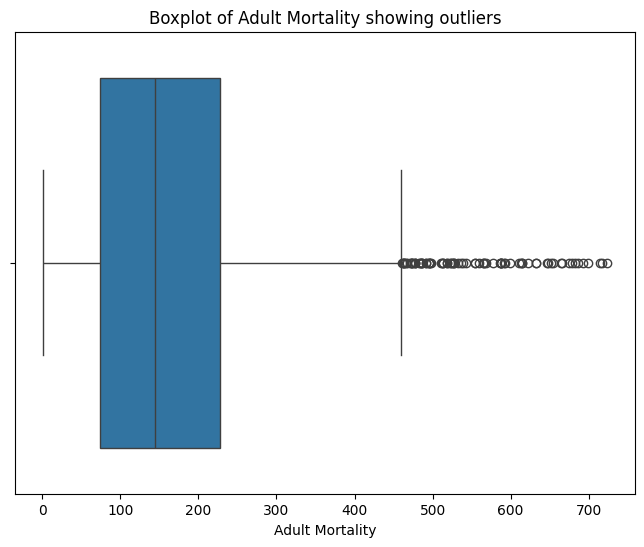

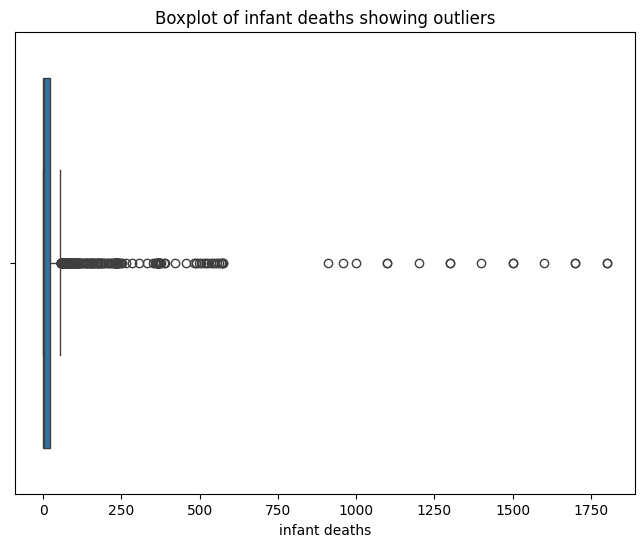

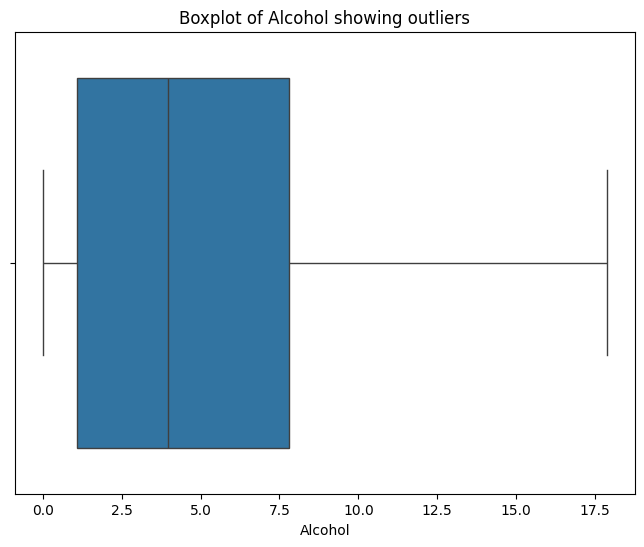

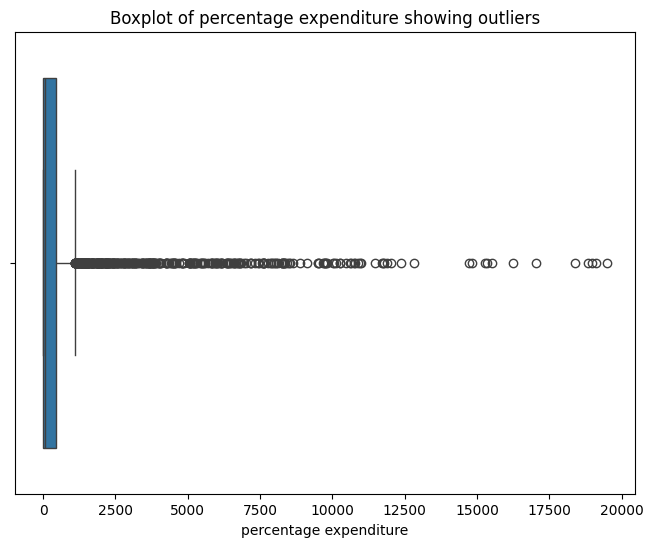

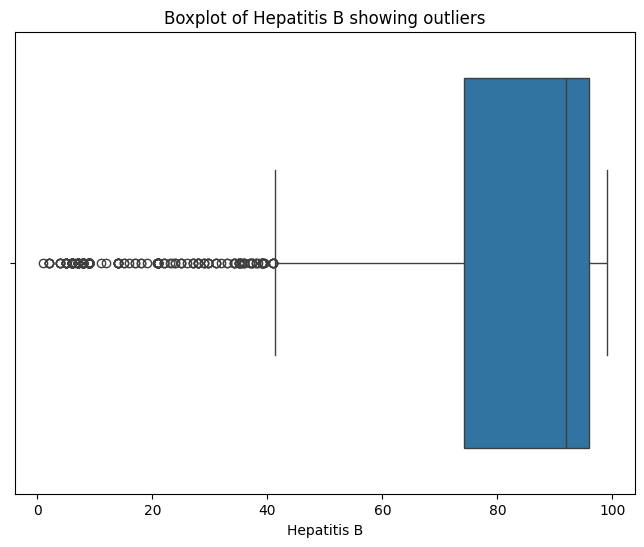

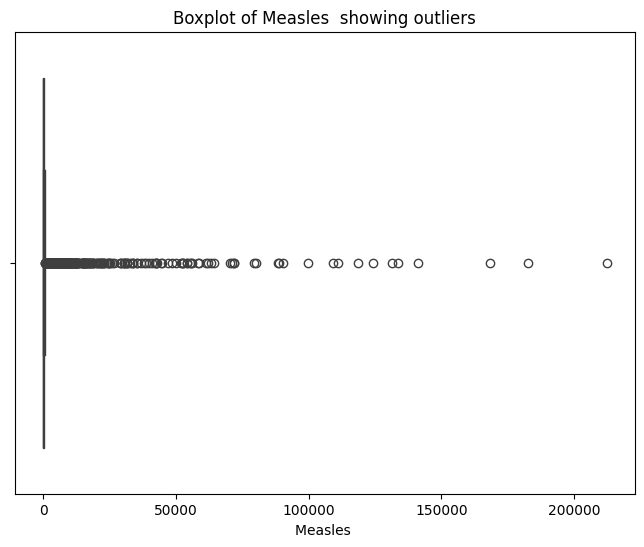

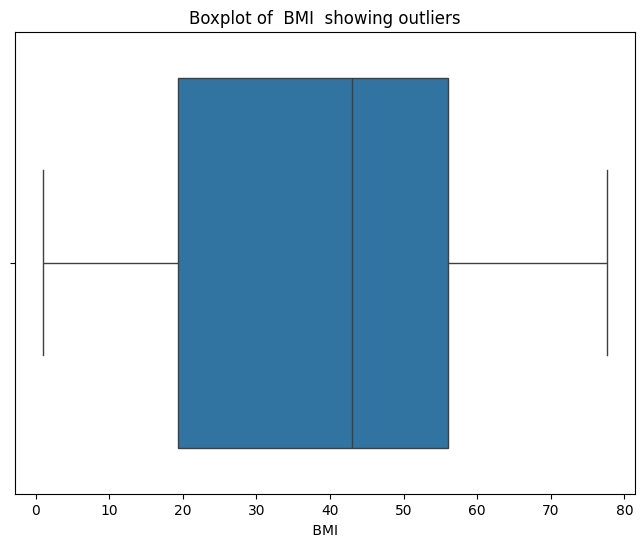

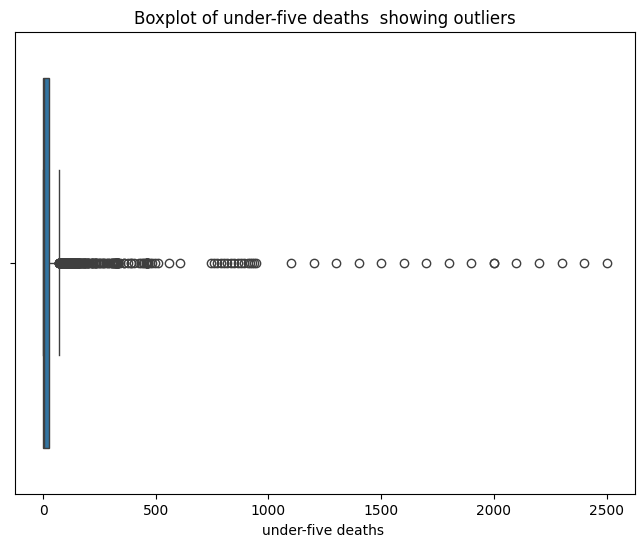

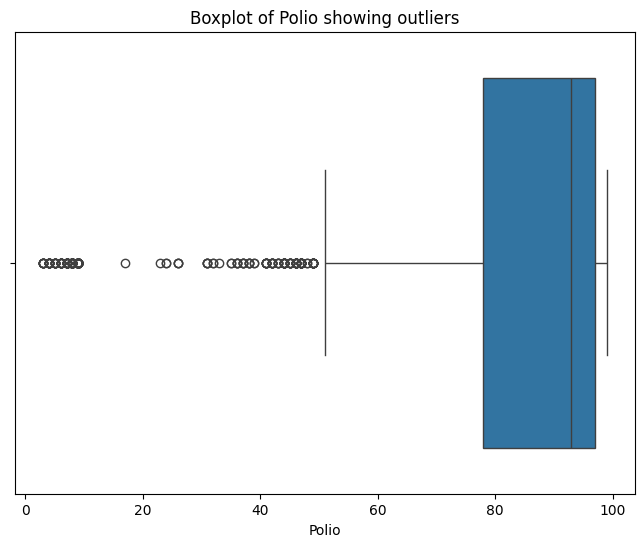

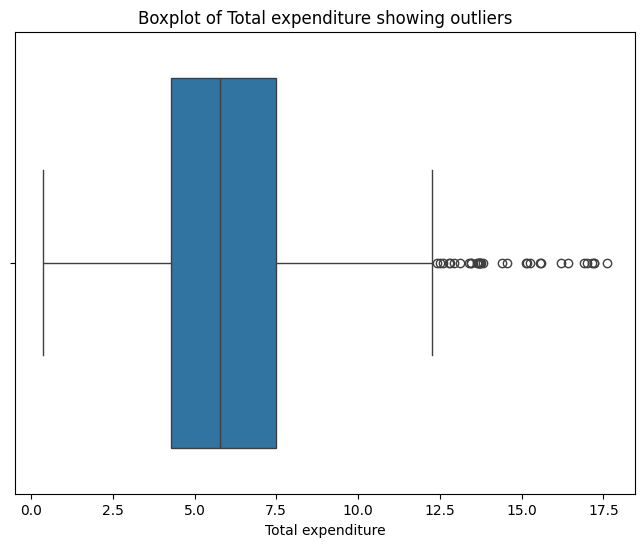

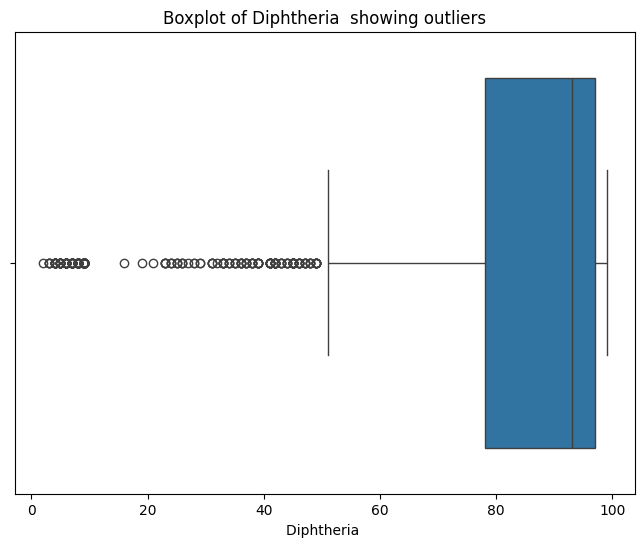

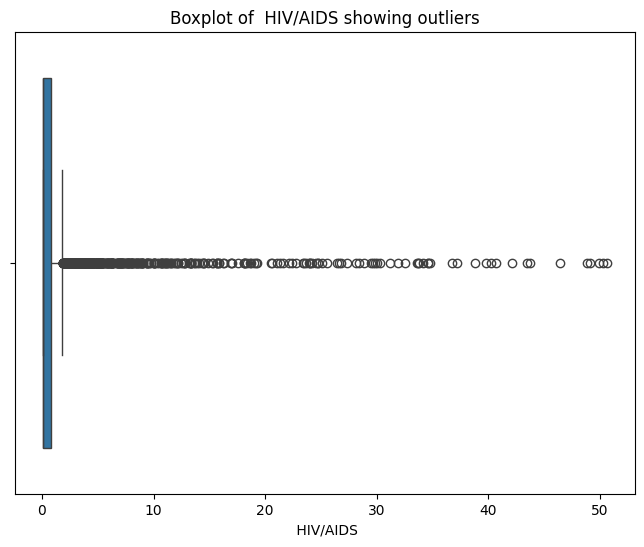

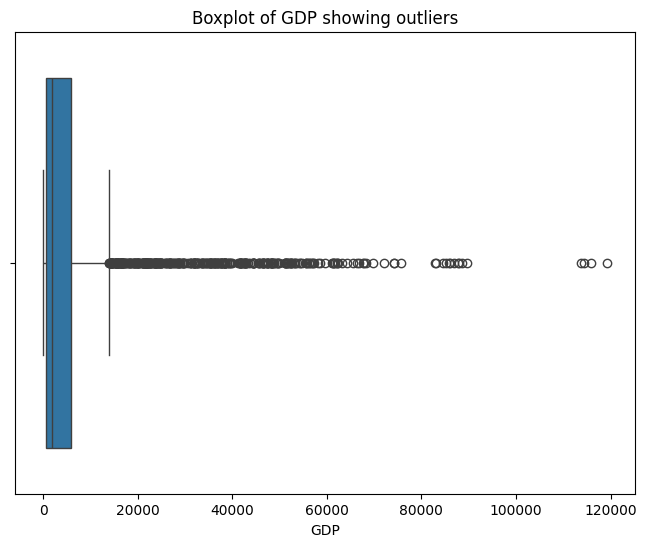

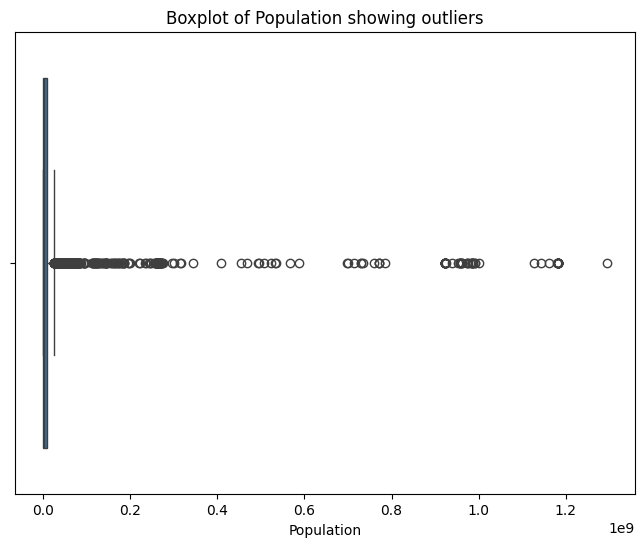

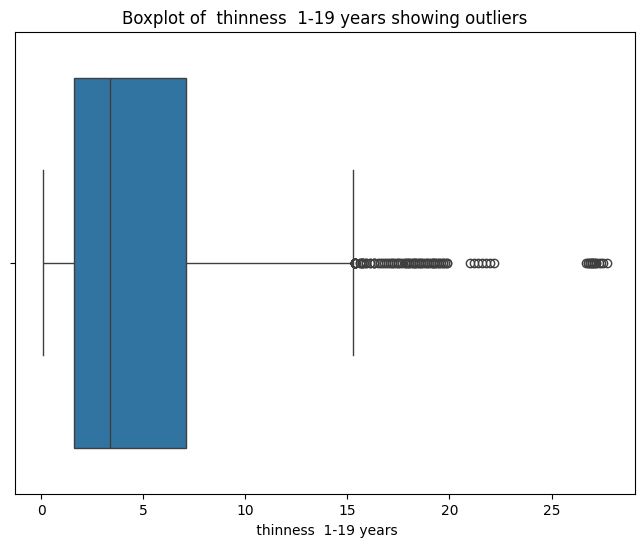

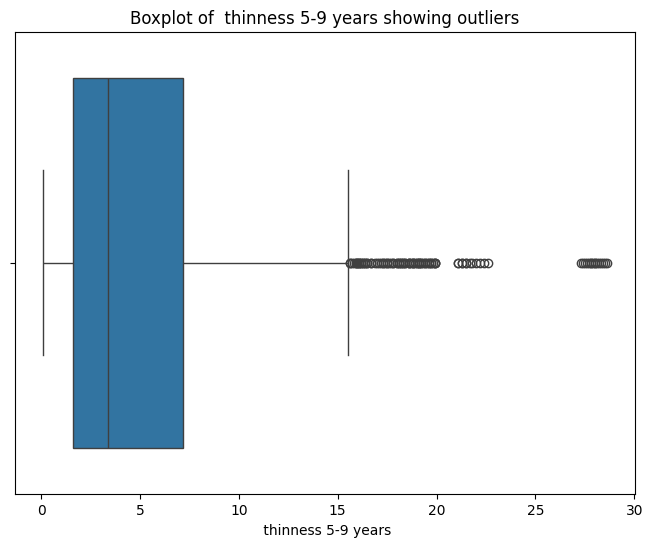

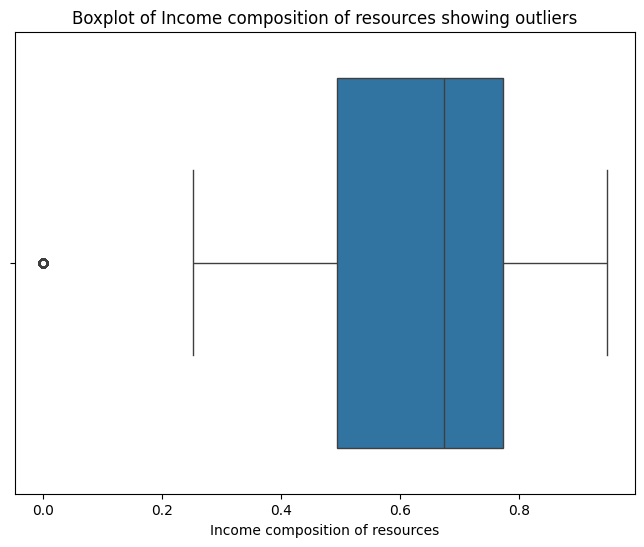

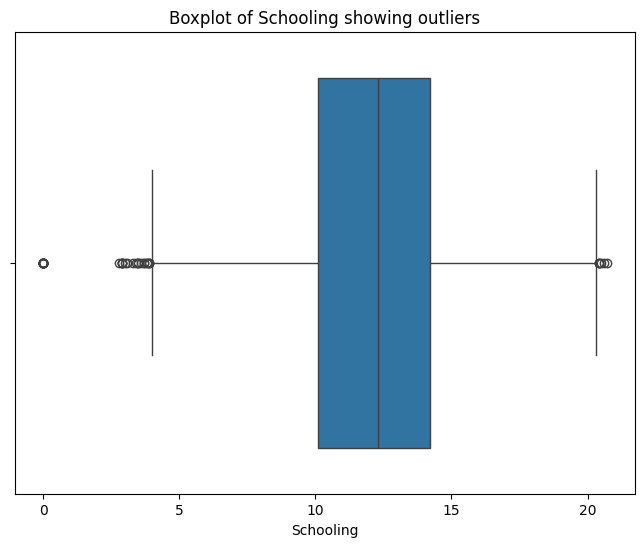

In [49]:
# prompt: visulaize the outliers

import matplotlib.pyplot as plt

# Assuming 'i' is your DataFrame and continuous_cols are identified as before

for col in continuous_cols:
    outliers = identify_outliers_iqr(i, col)
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=i[col])
    plt.title(f'Boxplot of {col} showing outliers')
    plt.xlabel(col)
    plt.show()

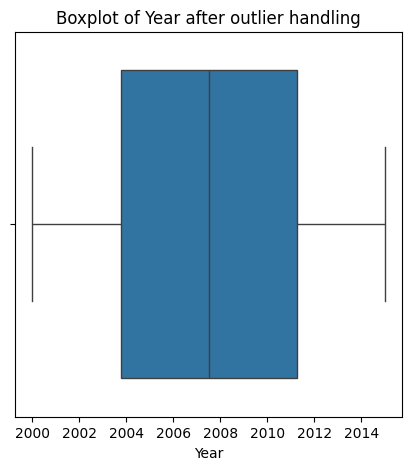

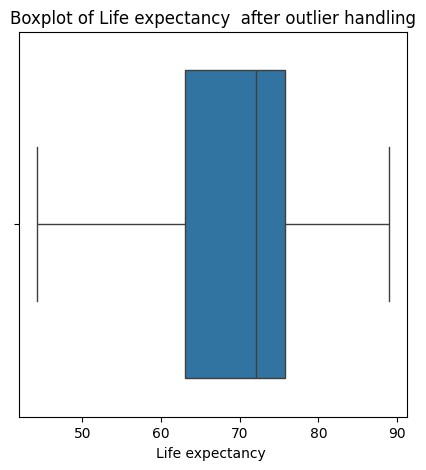

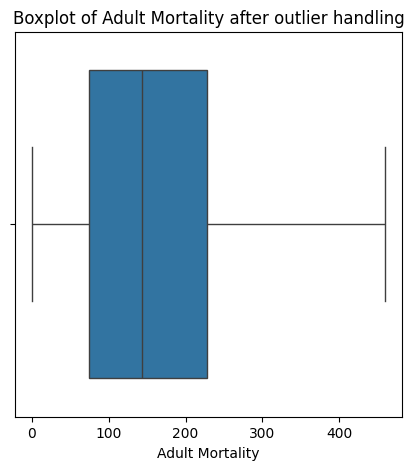

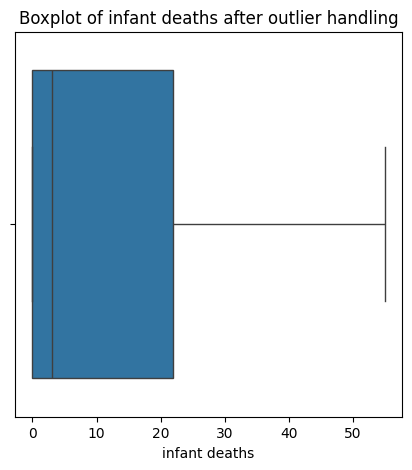

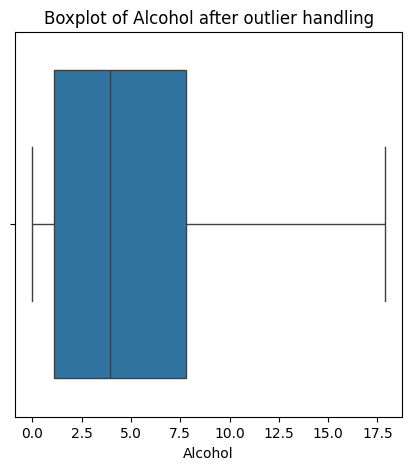

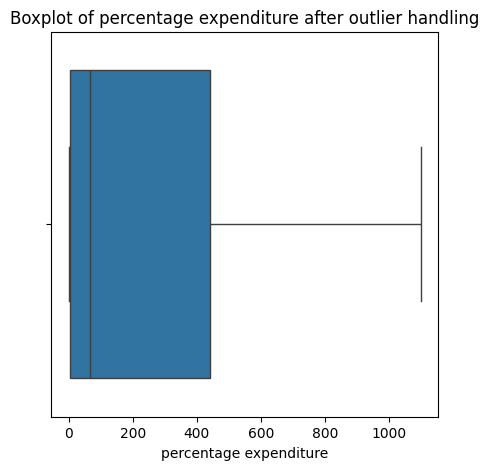

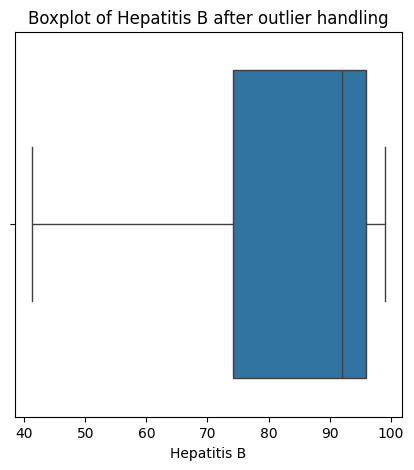

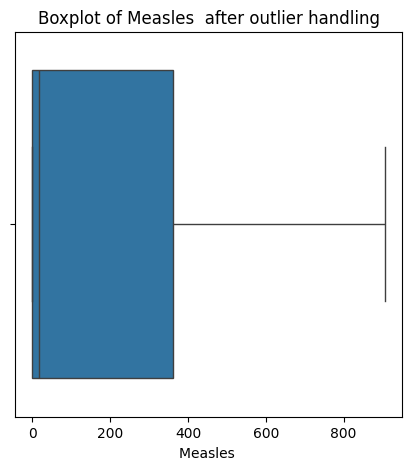

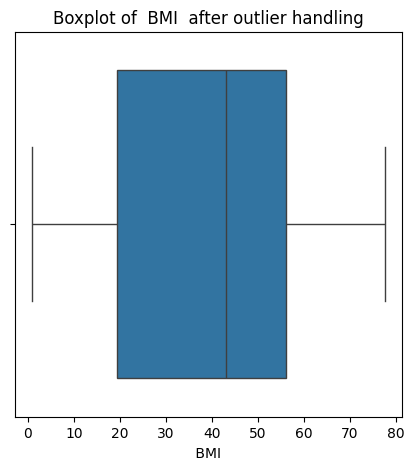

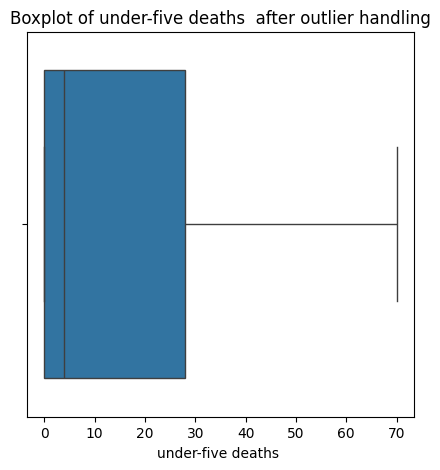

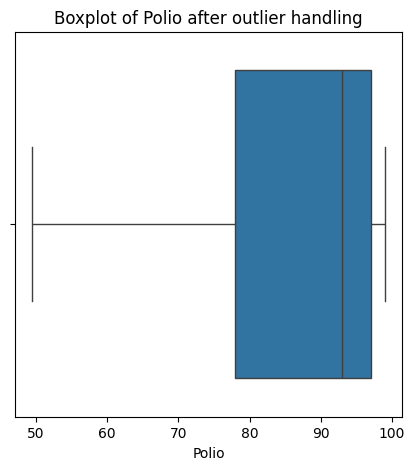

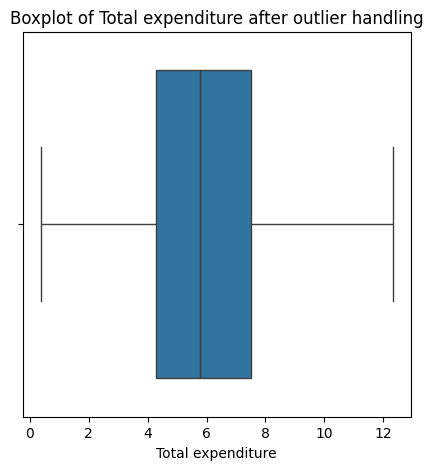

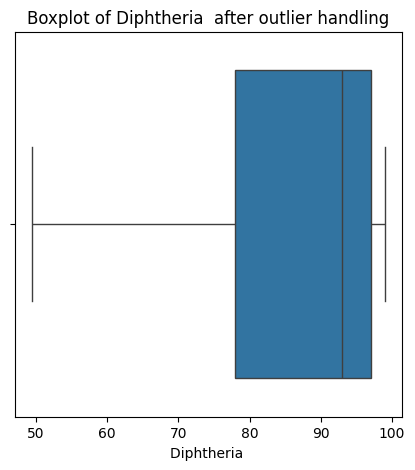

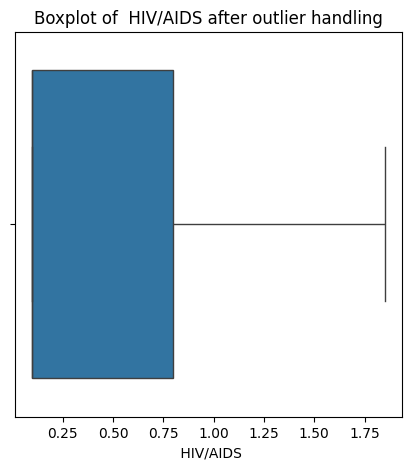

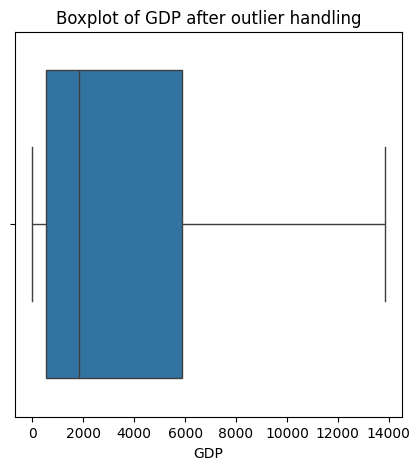

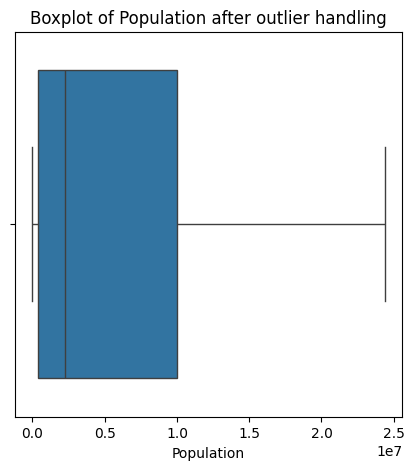

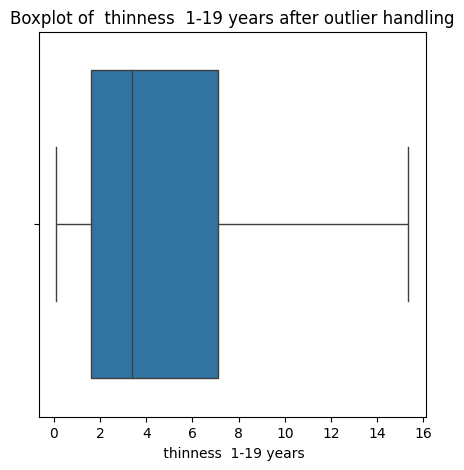

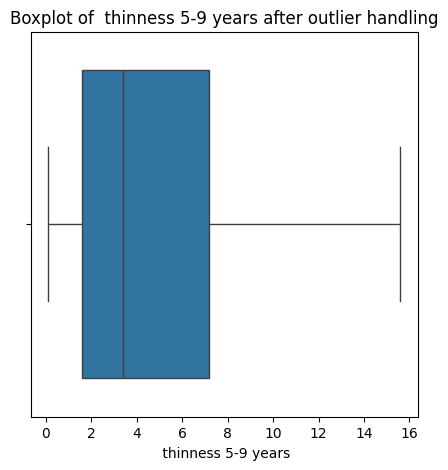

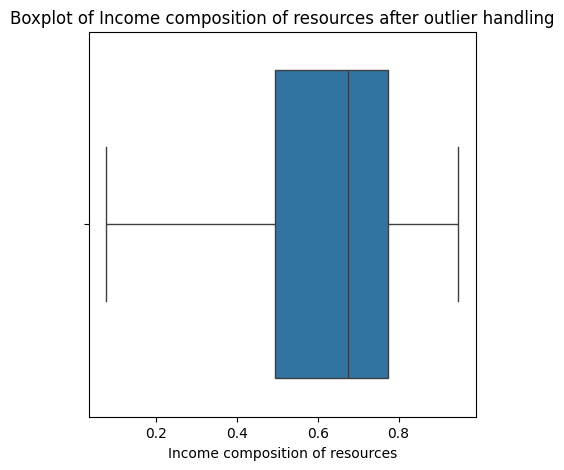

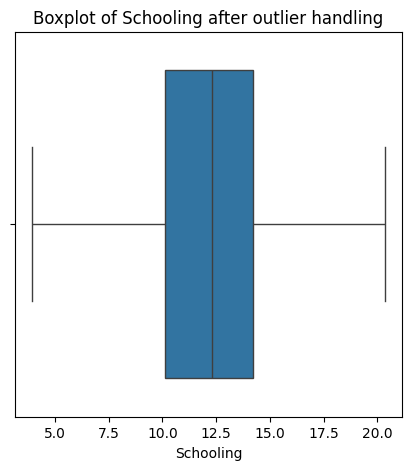

In [71]:


for col in continuous_cols:
    outliers = identify_outliers_iqr(i, col)
    # Instead of printing or removing, replace outliers with the upper or lower bound
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    i.loc[i[col] < lower_bound, col] = lower_bound
    i.loc[i[col] > upper_bound, col] = upper_bound

    plt.figure(figsize=(5,5))  # Adjust figure size if needed
    sns.boxplot(x=i[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.xlabel(col)
    plt.show()

LINEAR REGRESSION

In [51]:
# prompt: correlation matrix for continuous data variables

# Select only numeric columns for correlation calculation
numeric_i = i.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_i.corr()

# Print or display the correlation matrix
correlation_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169850,-0.067050,-0.044581,-0.007110,0.034294,0.155941,-0.119050,0.104094,-0.050064,0.115491,0.104375,0.147745,-0.087215,0.131882,0.015593,-0.046100,-0.046514,0.234047,0.204562
Life expectancy,0.169850,1.000000,-0.691429,-0.566844,0.410722,0.488666,0.330328,-0.336540,0.563275,-0.603891,0.568361,0.235385,0.574265,-0.796719,0.531023,-0.058338,-0.513977,-0.511273,0.739722,0.757700
Adult Mortality,-0.067050,-0.691429,1.000000,0.383773,-0.211201,-0.322344,-0.227826,0.210582,-0.395293,0.408007,-0.354243,-0.140160,-0.352950,0.602656,-0.346338,0.069299,0.344465,0.351998,-0.488255,-0.482199
infant deaths,-0.044581,-0.566844,0.383773,1.000000,-0.338479,-0.346488,-0.297100,0.580819,-0.447974,0.994233,-0.423110,-0.172419,-0.414340,0.414438,-0.361089,0.335470,0.429028,0.445237,-0.432480,-0.531391
Alcohol,-0.007110,0.410722,-0.211201,-0.338479,1.000000,0.362416,0.170103,-0.205258,0.338135,-0.345710,0.280260,0.326761,0.287216,-0.210899,0.435453,-0.010362,-0.439898,-0.431037,0.465415,0.547013
percentage expenditure,0.034294,0.488666,-0.322344,-0.346488,0.362416,1.000000,0.201170,-0.195363,0.330876,-0.354841,0.265804,0.167698,0.264442,-0.295704,0.774648,-0.165375,-0.332918,-0.334911,0.506222,0.526753
Hepatitis B,0.155941,0.330328,-0.227826,-0.297100,0.170103,0.201170,1.000000,-0.277656,0.221626,-0.303790,0.558876,0.152577,0.601832,-0.280112,0.258544,-0.191653,-0.171778,-0.181401,0.325688,0.333130
Measles,-0.119050,-0.336540,0.210582,0.580819,-0.205258,-0.195363,-0.277656,1.000000,-0.315942,0.578937,-0.319570,-0.168032,-0.314059,0.223328,-0.220727,0.257431,0.357683,0.362397,-0.242193,-0.342811
BMI,0.104094,0.563275,-0.395293,-0.447974,0.338135,0.330876,0.221626,-0.315942,1.000000,-0.469120,0.342183,0.233708,0.341041,-0.480048,0.388287,-0.054577,-0.554490,-0.563049,0.510170,0.546906
under-five deaths,-0.050064,-0.603891,0.408007,0.994233,-0.345710,-0.354841,-0.303790,0.578937,-0.469120,1.000000,-0.444068,-0.175134,-0.434664,0.454107,-0.373427,0.318453,0.440738,0.454961,-0.462236,-0.558542


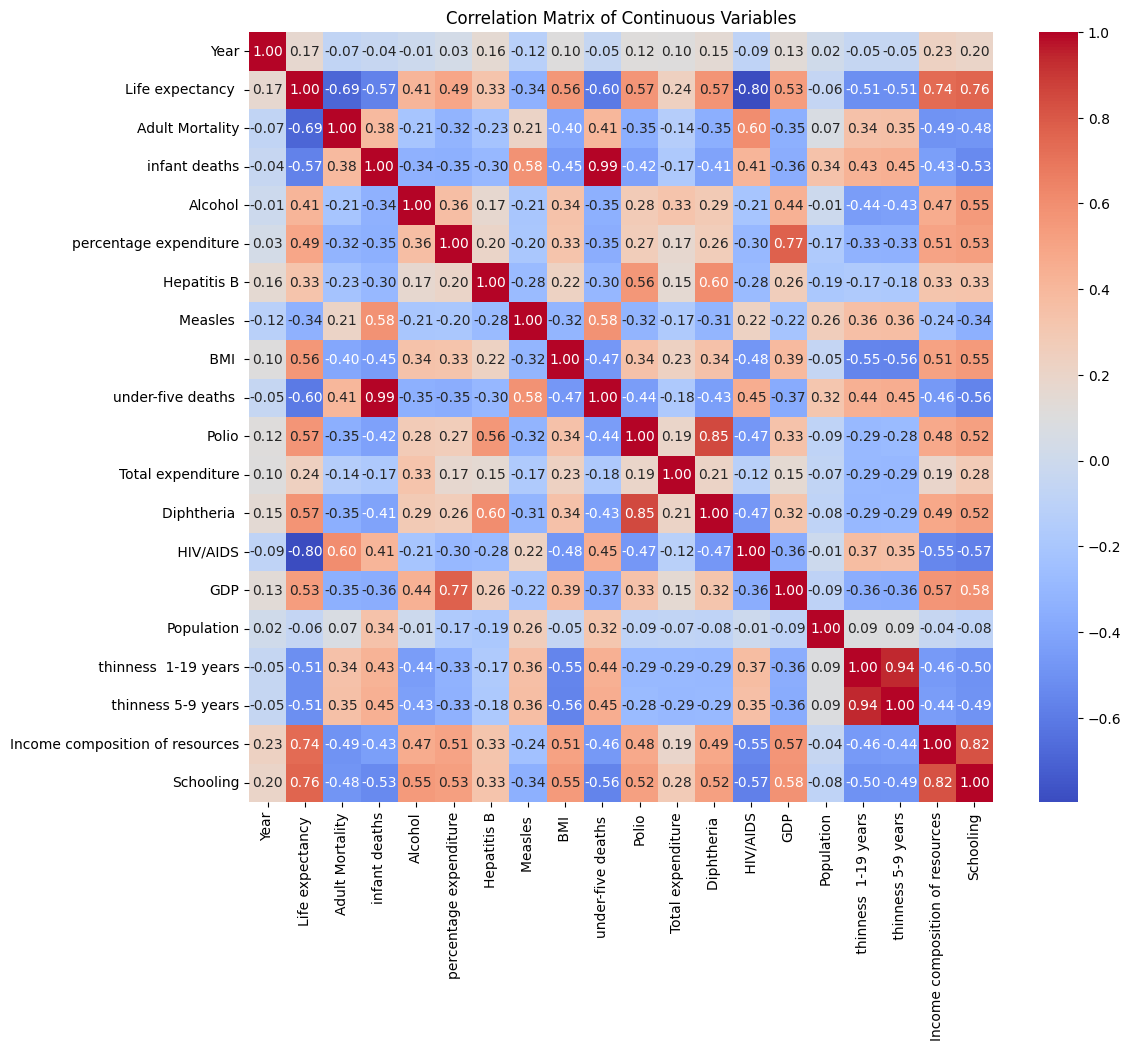

In [52]:
# prompt: visualize the matrix

# Assuming 'i' is your DataFrame and 'correlation_matrix' is calculated as before

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [53]:
X = i[["Schooling"]]
y = i["Life expectancy "]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
lr = LinearRegression()
lr.fit(X_train.values,y_train)


LinearRegression()

In [56]:
y_pred = lr.predict(X_test)
r2_score( y_test, y_pred)

0.6164974584833981

In [72]:
# prompt: print the equation

print(f"Life expectancy  = {lr.coef_[0]} * Schooling + {lr.intercept_}")

Life expectancy  = 35.87857121750865 * Schooling + 46.57834484797114


In [83]:
import pickle
with open('LESmodel.pkl','wb') as f:
    pickle.dump(lr,f)

In [84]:
with open('LESmodel.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [57]:
# prompt: repeat the same process of linear regression with Alcohol as independent variable

# Using Alcohol as the independent variable
X = i[["Alcohol"]]
y = i["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.16708098303335117

In [58]:
X = i[[" BMI "]]
y = i["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.30651977659280627

In [59]:
X = i[[' thinness  1-19 years']]  # Added an extra space before '1-19'
y = i["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.23480854822493513

In [60]:
X = i[["Income composition of resources"]]  # Remove the extra space at the end
y = i["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.values,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5753630927246003

In [61]:
# prompt: convert catehorical variables into dummy ariables and perform multiple regression with life expectancy as dependent variable

# Create dummy variables for categorical features
categorical_cols = ['Status', 'Country']  # Replace with your actual categorical column names
i = pd.get_dummies(i, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = i.drop('Life expectancy ', axis=1)
y = i['Life expectancy ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9523481650244644
Mean Squared Error: 4.112073662171941


In [62]:
# prompt: print the equation multiple regression equation

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -493.0909541671367
Coefficients: [ 2.83716073e-01 -8.89612323e-04  1.63145834e-01 -6.98308784e-02
  6.49919503e-04 -5.56656872e-03 -2.32141179e-04 -4.01358602e-03
 -2.44599301e-01  1.36108026e-02 -2.73940794e-02  1.73793873e-02
 -5.47287347e-01 -5.89770046e-05  3.03699643e-09 -9.07034715e-03
 -5.64611136e-02  2.11183215e-01  9.40162828e-02 -1.08608035e+01
  6.78452154e+00  7.70247385e+00 -8.49395675e+00  7.38393211e+00
  7.68092959e+00  5.19500683e+00  2.47625783e+00  2.63042978e+00
  3.36270543e+00  6.38938967e+00  7.31408647e+00  9.66090389e+00
  6.79613185e+00  2.24960492e+00  1.62250706e+00  1.45264677e+00
 -3.21416661e+00 -1.15795560e+00  1.49457818e+00  8.07614649e+00
 -1.03274239e+01  1.17367456e+01  7.77093718e+00 -5.73929327e+00
 -8.25643868e-01 -5.73677607e+00  4.57189300e+00  2.27146593e-02
 -3.61942907e+00  1.35380338e+01 -1.34219315e+01 -5.21102048e+00
  1.09806217e+01  1.43629660e+01  6.81006842e+00 -5.20429338e+00
 -5.82529582e+00  1.03604534e+01 -2.65719070e+

In [63]:
# Assuming 'model' is your multiple regression model trained in the previous cell
# and you want to predict on the first 10 rows of the data used for training
y_pred = model.predict(X_test[0:10])
y_pred

array([56.37905106, 70.16990749, 82.61062399, 77.2227112 , 53.2078708 ,
       65.38138152, 74.44040738, 73.75521254, 77.99168223, 67.70028687])

In [65]:
# Assuming 'model' is your multiple regression model trained in the previous cell
# and you want to predict on the ENTIRE test dataset
y_pred = model.predict(X_test)  # Removed [0:10] to predict on the full test set

# Now create the DataFrame with aligned lengths
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2399    56.5  56.379051
196     73.0  70.169907
2316    82.5  82.610624
1735    75.6  77.222711
1102    53.0  53.207871


In [68]:
import pickle
with open('lemodel.pkl','wb') as f:
    pickle.dump(y_pred,f)

In [69]:
with open('lemodel.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [78]:

import pickle
with open('lemodel.pkl','wb') as f:
    pickle.dump(model,f) # changed y_pred to model

In [77]:
with open('lemodel.pkl', 'rb') as f:
    clf2 = pickle.load(f)